In [1]:
import os
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import AutoMinorLocator, MaxNLocator, ScalarFormatter
from matplotlib.gridspec import GridSpec
# Configuración del directorio actual y del directorio de utilidades
current_dir = os.getcwd()
utilities_dir = os.path.join(current_dir, '../../utils')
sys.path.insert(0, utilities_dir)
from plotting import *  # Importar utilidades de trazado personalizadas

In [2]:
# Leer los archivos CSV, especificando que el delimitador es una coma y saltar las primeras líneas
df_ml = pd.read_csv('data/ml.csv', skiprows=6, delimiter=',')
df_nm = pd.read_csv('data/nm.csv', skiprows=6, delimiter=',')
df_nm_ml = pd.read_csv('data/nm_ml.csv', skiprows=6, delimiter=',')
df_waves = pd.read_csv('data/wave.csv', skiprows=6, delimiter=',')
df_total = pd.read_csv('data/total.csv', skiprows=6, delimiter=',')


# Extraer los datos de las columnas
years_ml = df_ml.iloc[:, 0].tolist()
works_ml = df_ml.iloc[:, 1].tolist()
years_nm = df_nm.iloc[:, 0].tolist()
works_nm = df_nm.iloc[:, 1].tolist()
years_nm_ml = df_nm_ml.iloc[:, 0].tolist()
works_nm_ml = df_nm_ml.iloc[:, 1].tolist()
years_waves = df_waves.iloc[:, 0].tolist()
works_waves = df_waves.iloc[:, 1].tolist()
years_total = df_total.iloc[:, 0].tolist()
works_total = df_total.iloc[:, 1].tolist()


# Crear diccionarios de datos
data_ml = {
    'YEAR': years_ml,
    'WORKS': works_ml
}

data_nm = {
    'YEAR': years_nm,
    'WORKS': works_nm
}

data_nm_ml = {
    'YEAR': years_nm_ml,
    'WORKS': works_nm_ml
}

data_waves = {
    'YEAR': years_waves,
    'WORKS': works_waves
}

data_total = {
    'YEAR': years_total,
    'WORKS': works_total
}

# Crear diccionario de datos relativos
data_relative_ml = {
    'YEAR': data_ml['YEAR'],
    'WORKS': np.array(data_ml['WORKS']) / np.array(data_total['WORKS'])
}

data_relative_nm = {
    'YEAR': data_nm['YEAR'],
    'WORKS': np.array(data_nm['WORKS']) / np.array(data_total['WORKS'])
}


data_relative_nm_ml = {
    'YEAR': data_nm_ml['YEAR'],
    'WORKS': np.array(data_nm_ml['WORKS']) / np.array(data_total['WORKS'])
}

 
data_relative_waves = {
    'YEAR': data_waves['YEAR'],
    'WORKS': np.array(data_waves['WORKS']) / np.array(data_total['WORKS'])
}

In [3]:
# === Read CSVs ===
df_ml = pd.read_csv('data/ml.csv', skiprows=6, delimiter=',')
df_nm = pd.read_csv('data/nm.csv', skiprows=6, delimiter=',')
df_nm_ml = pd.read_csv('data/nm_ml.csv', skiprows=6, delimiter=',')
df_waves = pd.read_csv('data/wave.csv', skiprows=6, delimiter=',')
df_total = pd.read_csv('data/total.csv', skiprows=6, delimiter=',')

# === Extract columns ===
years_ml, works_ml = df_ml.iloc[:, 0].to_numpy(), df_ml.iloc[:, 1].to_numpy()
years_nm, works_nm = df_nm.iloc[:, 0].to_numpy(), df_nm.iloc[:, 1].to_numpy()
years_nm_ml, works_nm_ml = df_nm_ml.iloc[:, 0].to_numpy(), df_nm_ml.iloc[:, 1].to_numpy()
years_waves, works_waves = df_waves.iloc[:, 0].to_numpy(), df_waves.iloc[:, 1].to_numpy()
years_total, works_total = df_total.iloc[:, 0].to_numpy(), df_total.iloc[:, 1].to_numpy()

# === Range filter (2010–2024) ===
mask_range = (years_total >= 2010) & (years_total <= 2024)
years = years_total[mask_range]
works_total = works_total[mask_range]

def filter_range(years_src, works_src):
    mask = (years_src >= 2010) & (years_src <= 2024)
    return years_src[mask], works_src[mask]

years_ml, works_ml = filter_range(years_ml, works_ml)
years_nm, works_nm = filter_range(years_nm, works_nm)
years_nm_ml, works_nm_ml = filter_range(years_nm_ml, works_nm_ml)
years_waves, works_waves = filter_range(years_waves, works_waves)

# === Relative fractions ===
rel = lambda w: w / works_total
data_relative_ml = {'YEAR': years_ml, 'WORKS': rel(works_ml)}
data_relative_nm = {'YEAR': years_nm, 'WORKS': rel(works_nm)}
data_relative_nm_ml = {'YEAR': years_nm_ml, 'WORKS': rel(works_nm_ml)}
data_relative_waves = {'YEAR': years_waves, 'WORKS': rel(works_waves)}


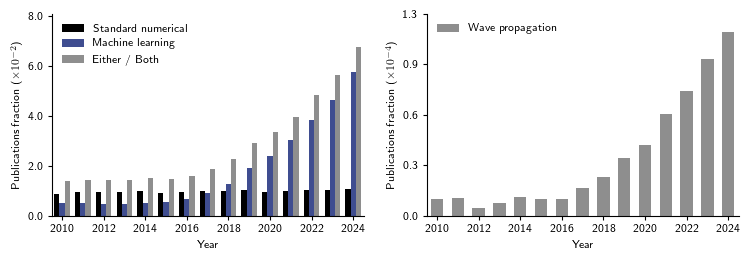

In [4]:
 
# === Colors and style ===
color_standard = '#000000'
color_ml = '#3f4d90'
color_either = "#8e8e8e"
color_wave = '#8e8e8e'   # gray for wave plot
bar_width = 0.25

# === Figure with GridSpec (two columns) ===
fig = plt.figure(figsize=(7.5, 2.5), constrained_layout=True)
gs = GridSpec(1, 2, width_ratios=[1, 1], figure=fig)
fig.set_constrained_layout_pads(w_pad=0.10, h_pad=0.05)

# === Left subplot: Standard / ML / Both ===
ax1 = fig.add_subplot(gs[0])
years = np.array(years)
pos_std = years - bar_width
pos_ml = years
pos_either = years + bar_width

ax1.bar(pos_std, data_relative_nm['WORKS']*1e2, width=bar_width,
        color=color_standard, label='Standard numerical')
ax1.bar(pos_ml, data_relative_ml['WORKS']*1e2, width=bar_width,
        color=color_ml, label='Machine learning')
ax1.bar(pos_either, data_relative_nm_ml['WORKS']*1e2, width=bar_width,
        color=color_either, label='Either / Both')

ax1.set_xlabel("Year")
ax1.set_ylabel(r"Publications fraction ($\times 10^{-2}$)")
ax1.set_xticks(np.arange(2010, 2025, 2))
ax1.set_xticklabels(np.arange(2010, 2025, 2))
ax1.set_yticks(np.arange(0, max(data_relative_nm_ml['WORKS']*1e2)*1.2, 2))
ax1.set_yticklabels(np.arange(0, max(data_relative_nm_ml['WORKS']*1e2)*1.2, 2))
ax1.set_xlim(2009.5, 2024.5)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='both', labelsize=8, direction='out', length=3, width=0.8, color='black')
ax1.legend(frameon=False, loc='upper left')
ax1.set_ylim(0, max(data_relative_nm_ml['WORKS']*1e2) * 1.2)
ax1.grid(False)
# === Right subplot: Wave Propagation ===
ax2 = fig.add_subplot(gs[1])

ax2.bar(data_relative_waves['YEAR'], data_relative_waves['WORKS']*1e4,
        width=0.6, color=color_wave, linewidth=0.6,
        label='Wave propagation')
ax2.grid(False)
ax2.set_xlabel("Year")
ax2.set_ylabel(r"Publications fraction ($\times 10^{-4}$)")
ax2.set_yticks(np.linspace(0, max(data_relative_waves['WORKS']*1e4)*1.1, 5))
# Generate tick values
ticks = np.linspace(0, max(data_relative_waves['WORKS']*1e4)*1.1, 5)


# Make remaining axes black
for ax in [ax1, ax2]:
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')

# Set tick labels with 2 decimals
ax2.set_yticklabels([f"{t:.1f}" for t in ticks])
ax2.tick_params(axis='both', labelsize=8, direction='out', length=3, width=0.8, color='black')
ax2.set_xticks(np.arange(2010, 2025, 2))
ax2.set_xticklabels(np.arange(2010, 2025, 2))
ax2.set_xlim(2009.5, 2024.5)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.legend(frameon=False, loc='upper left')
ax2.set_ylim(0, max(data_relative_waves['WORKS'])*1e4 * 1.1)
plt.savefig("publications.pdf", bbox_inches="tight", dpi=300)
plt.savefig("publications.svg", bbox_inches="tight", dpi=300)
plt.show()


/tmp/ipykernel_93633/4040770102.py:77: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig("trend_frameworks.pdf", bbox_inches="tight", dpi=300)
/tmp/ipykernel_93633/4040770102.py:78: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig("trend_frameworks.svg", bbox_inches="tight", dpi=300)
/home/orincon/miniconda3/envs/comparative-pinns-bem-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


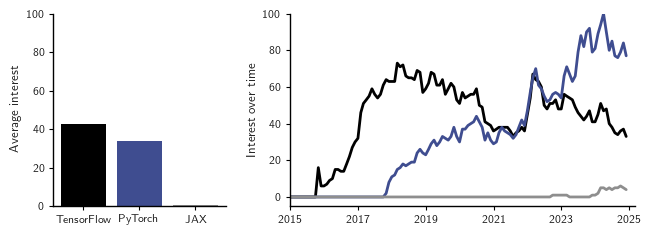

In [7]:
 

df = pd.read_csv("data/frameworks.csv", skiprows=1)
# === Clean special values ===
df.replace("<1", 0.0, inplace=True)
# === Clean column names ===
df.columns = [c.strip().replace(': (Worldwide)', '') for c in df.columns]

# === Convert Month to datetime ===
df['Month'] = pd.to_datetime(df['Month'], errors='coerce')

# === Convert numeric columns safely ===
for col in ['TensorFlow', 'PyTorch', 'JAX']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# === Drop any rows with missing months ===
df = df.dropna(subset=['Month'])

# === Plot setup ===
plt.style.use('seaborn-v0_8-whitegrid')
fig = plt.figure(figsize=(7.5, 2.5), constrained_layout=True)
fig.set_constrained_layout_pads(w_pad=0.10, h_pad=0.01)

gs = GridSpec(1, 2, width_ratios=[1.5, 3], wspace=0.25)
fig.set_constrained_layout_pads(w_pad=0.10, h_pad=0.05)

bar_ax = fig.add_subplot(gs[0])
line_ax = fig.add_subplot(gs[1])

# === Colors ===
colors = ['#000000', '#3f4d90', '#8e8e8e']

# === Average bar plot ===
means = df[['TensorFlow', 'PyTorch', 'JAX']].mean()
bar_ax.bar(means.index, means.values, color=colors)
bar_ax.set_ylabel("Average interest", fontsize=9)
bar_ax.set_ylim(0, 100)
bar_ax.tick_params(axis='both', labelsize=8, direction='out', length=3, width=0.8, color='black')
bar_ax.set_yticks(np.arange(0, 101, 20))
bar_ax.set_yticklabels(np.arange(0, 101, 20))

# Remove top and right spines
for spine in ['top', 'right']:
    bar_ax.spines[spine].set_visible(False)

# === Time series plot ===
line_ax.plot(df['Month'], df['TensorFlow'], color=colors[0], linewidth=2, label="TensorFlow")
line_ax.plot(df['Month'], df['PyTorch'], color=colors[1], linewidth=2, label="PyTorch")
line_ax.plot(df['Month'], df['JAX'], color=colors[2], linewidth=2, label="JAX")

# X-axis ticks every 2 years, include 2025 but shorten range
years = np.arange(df['Month'].dt.year.min(), 2026, 2)
tick_positions = [pd.Timestamp(f"{y}-01-01") for y in years]
line_ax.set_xticks(tick_positions)
line_ax.set_xticklabels(years)
line_ax.set_yticks(np.arange(0, 101, 20))
line_ax.set_yticklabels(np.arange(0, 101, 20))

line_ax.set_xlim(df['Month'].min(), pd.Timestamp("2025-03-01"))  # shorter range
line_ax.set_ylim(-5, 100)
line_ax.set_ylabel("Interest over time", fontsize=9)

# Tick params and black axes
line_ax.tick_params(axis='x', direction='out', length=3, width=0.8, labelsize=8, color='black')
line_ax.tick_params(axis='y', direction='out', length=3, width=0.8, labelsize=8, color='black')

# Remove top and right spines
for spine in ['top', 'right']:
    line_ax.spines[spine].set_visible(False)

# Make remaining axes black
for ax in [bar_ax, line_ax]:
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')

bar_ax.grid(False)
line_ax.grid(False)

plt.savefig("trend_frameworks.pdf", bbox_inches="tight", dpi=300)
plt.savefig("trend_frameworks.svg", bbox_inches="tight", dpi=300)

plt.show()

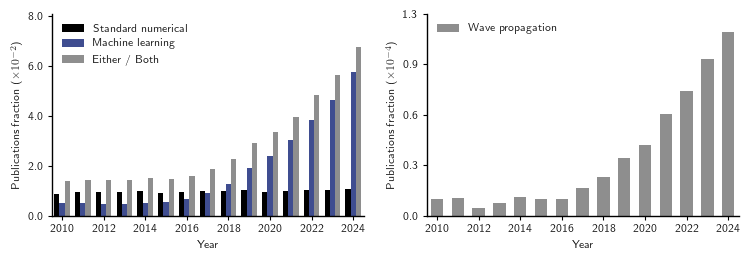

/tmp/ipykernel_93633/1865141302.py:171: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig("trend_frameworks.pdf", bbox_inches="tight", dpi=300)
/tmp/ipykernel_93633/1865141302.py:172: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig("trend_frameworks.svg", bbox_inches="tight", dpi=300)
/home/orincon/miniconda3/envs/comparative-pinns-bem-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


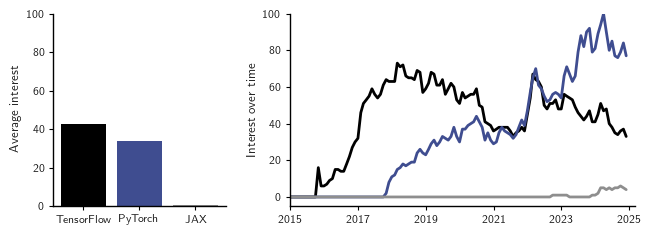

In [11]:
# === Range filter (2010–2024) ===
mask_range = (years_total >= 2010) & (years_total <= 2024)
years = years_total[mask_range]
works_total = works_total[mask_range]

def filter_range(years_src, works_src):
    mask = (years_src >= 2010) & (years_src <= 2024)
    return years_src[mask], works_src[mask]

years_ml, works_ml = filter_range(years_ml, works_ml)
years_nm, works_nm = filter_range(years_nm, works_nm)
years_nm_ml, works_nm_ml = filter_range(years_nm_ml, works_nm_ml)
years_waves, works_waves = filter_range(years_waves, works_waves)

# === Relative fractions ===
rel = lambda w: w / works_total
data_relative_ml = {'YEAR': years_ml, 'WORKS': rel(works_ml)}
data_relative_nm = {'YEAR': years_nm, 'WORKS': rel(works_nm)}
data_relative_nm_ml = {'YEAR': years_nm_ml, 'WORKS': rel(works_nm_ml)}
data_relative_waves = {'YEAR': years_waves, 'WORKS': rel(works_waves)}
 
# === Colors and style ===
color_standard = '#000000'
color_ml = '#3f4d90'
color_either = "#8e8e8e"
color_wave = '#8e8e8e'   # gray for wave plot
bar_width = 0.25

# === Figure with GridSpec (two columns) ===
fig = plt.figure(figsize=(7.5, 2.5), constrained_layout=True)
gs = GridSpec(1, 2, width_ratios=[1, 1], figure=fig)
fig.set_constrained_layout_pads(w_pad=0.10, h_pad=0.05)

# === Left subplot: Standard / ML / Both ===
ax1 = fig.add_subplot(gs[0])
years = np.array(years)
pos_std = years - bar_width
pos_ml = years
pos_either = years + bar_width

ax1.bar(pos_std, data_relative_nm['WORKS']*1e2, width=bar_width,
        color=color_standard, label='Standard numerical')
ax1.bar(pos_ml, data_relative_ml['WORKS']*1e2, width=bar_width,
        color=color_ml, label='Machine learning')
ax1.bar(pos_either, data_relative_nm_ml['WORKS']*1e2, width=bar_width,
        color=color_either, label='Either / Both')

ax1.set_xlabel("Year")
ax1.set_ylabel(r"Publications fraction ($\times 10^{-2}$)")
ax1.set_xticks(np.arange(2010, 2025, 2))
ax1.set_xticklabels(np.arange(2010, 2025, 2))
ax1.set_yticks(np.arange(0, max(data_relative_nm_ml['WORKS']*1e2)*1.2, 2))
ax1.set_yticklabels(np.arange(0, max(data_relative_nm_ml['WORKS']*1e2)*1.2, 2))
ax1.set_xlim(2009.5, 2024.5)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='both', labelsize=8, direction='out', length=3, width=0.8, color='black')
ax1.legend(frameon=False, loc='upper left')
ax1.set_ylim(0, max(data_relative_nm_ml['WORKS']*1e2) * 1.2)
ax1.grid(False)
# === Right subplot: Wave Propagation ===
ax2 = fig.add_subplot(gs[1])

ax2.bar(data_relative_waves['YEAR'], data_relative_waves['WORKS']*1e4,
        width=0.6, color=color_wave, linewidth=0.6,
        label='Wave propagation')
ax2.grid(False)
ax2.set_xlabel("Year")
ax2.set_ylabel(r"Publications fraction ($\times 10^{-4}$)")
ax2.set_yticks(np.linspace(0, max(data_relative_waves['WORKS']*1e4)*1.1, 5))
# Generate tick values
ticks = np.linspace(0, max(data_relative_waves['WORKS']*1e4)*1.1, 5)


# Make remaining axes black
for ax in [ax1, ax2]:
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')

# Set tick labels with 2 decimals
ax2.set_yticklabels([f"{t:.1f}" for t in ticks])
ax2.tick_params(axis='both', labelsize=8, direction='out', length=3, width=0.8, color='black')
ax2.set_xticks(np.arange(2010, 2025, 2))
ax2.set_xticklabels(np.arange(2010, 2025, 2))
ax2.set_xlim(2009.5, 2024.5)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.legend(frameon=False, loc='upper left')
ax2.set_ylim(0, max(data_relative_waves['WORKS'])*1e4 * 1.1)
plt.savefig("publications.pdf", bbox_inches="tight", dpi=300)
plt.savefig("publications.svg", bbox_inches="tight", dpi=300)
plt.show()


df = pd.read_csv("data/frameworks.csv", skiprows=1)
# === Clean special values ===
df.replace("<1", 0.0, inplace=True)
# === Clean column names ===
df.columns = [c.strip().replace(': (Worldwide)', '') for c in df.columns]

# === Convert Month to datetime ===
df['Month'] = pd.to_datetime(df['Month'], errors='coerce')

# === Convert numeric columns safely ===
for col in ['TensorFlow', 'PyTorch', 'JAX']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# === Drop any rows with missing months ===
df = df.dropna(subset=['Month'])

# === Plot setup ===
plt.style.use('seaborn-v0_8-whitegrid')
fig = plt.figure(figsize=(7.5, 2.5), constrained_layout=True)
fig.set_constrained_layout_pads(w_pad=0.10, h_pad=0.01)

gs = GridSpec(1, 2, width_ratios=[1.5, 3], wspace=0.25)
fig.set_constrained_layout_pads(w_pad=0.10, h_pad=0.05)

bar_ax = fig.add_subplot(gs[0])
line_ax = fig.add_subplot(gs[1])

# === Colors ===
colors = ['#000000', '#3f4d90', '#8e8e8e']

# === Average bar plot ===
means = df[['TensorFlow', 'PyTorch', 'JAX']].mean()
bar_ax.bar(means.index, means.values, color=colors)
bar_ax.set_ylabel("Average interest", fontsize=9)
bar_ax.set_ylim(0, 100)
bar_ax.tick_params(axis='both', labelsize=8, direction='out', length=3, width=0.8, color='black')
bar_ax.set_yticks(np.arange(0, 101, 20))
bar_ax.set_yticklabels(np.arange(0, 101, 20))

# Remove top and right spines
for spine in ['top', 'right']:
    bar_ax.spines[spine].set_visible(False)

# === Time series plot ===
line_ax.plot(df['Month'], df['TensorFlow'], color=colors[0], linewidth=2, label="TensorFlow")
line_ax.plot(df['Month'], df['PyTorch'], color=colors[1], linewidth=2, label="PyTorch")
line_ax.plot(df['Month'], df['JAX'], color=colors[2], linewidth=2, label="JAX")

# X-axis ticks every 2 years, include 2025 but shorten range
years = np.arange(df['Month'].dt.year.min(), 2026, 2)
tick_positions = [pd.Timestamp(f"{y}-01-01") for y in years]
line_ax.set_xticks(tick_positions)
line_ax.set_xticklabels(years)
line_ax.set_yticks(np.arange(0, 101, 20))
line_ax.set_yticklabels(np.arange(0, 101, 20))

line_ax.set_xlim(df['Month'].min(), pd.Timestamp("2025-03-01"))  # shorter range
line_ax.set_ylim(-5, 100)
line_ax.set_ylabel("Interest over time", fontsize=9)

# Tick params and black axes
line_ax.tick_params(axis='x', direction='out', length=3, width=0.8, labelsize=8, color='black')
line_ax.tick_params(axis='y', direction='out', length=3, width=0.8, labelsize=8, color='black')

# Remove top and right spines
for spine in ['top', 'right']:
    line_ax.spines[spine].set_visible(False)

# Make remaining axes black
for ax in [bar_ax, line_ax]:
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')

bar_ax.grid(False)
line_ax.grid(False)

plt.savefig("trend_frameworks.pdf", bbox_inches="tight", dpi=300)
plt.savefig("trend_frameworks.svg", bbox_inches="tight", dpi=300)

plt.show()

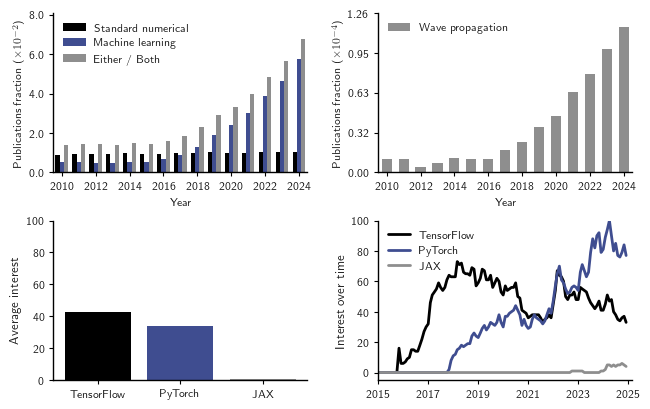

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# === Colors ===
color_standard = '#000000'
color_ml = '#3f4d90'
color_either = "#8e8e8e"
color_wave = '#8e8e8e'   # gray for wave plot
bar_width = 0.25
colors_frameworks = ['#000000', '#3f4d90', '#8e8e8e']

# === Create figure with 2x2 GridSpec ===
fig = plt.figure(figsize=(6.5, 4), constrained_layout=True)
gs = GridSpec(2, 2, figure=fig)
fig.set_constrained_layout_pads(w_pad=0.1, h_pad=0.05)

# === Top-left: Standard / ML / Both ===
ax1 = fig.add_subplot(gs[0, 0])

# x positions are the filtered years for each category
pos_std = years_nm - bar_width
pos_ml = years_ml
pos_either = years_nm_ml + bar_width

ax1.bar(pos_std, data_relative_nm['WORKS']*1e2, width=bar_width,
        color=color_standard, label='Standard numerical')
ax1.bar(pos_ml, data_relative_ml['WORKS']*1e2, width=bar_width,
        color=color_ml, label='Machine learning')
ax1.bar(pos_either, data_relative_nm_ml['WORKS']*1e2, width=bar_width,
        color=color_either, label='Either / Both')

ax1.set_xlabel("Year")
ax1.set_ylabel(r"Publications fraction ($\times 10^{-2}$)")
ax1.set_yticks(np.arange(0, max(data_relative_nm_ml['WORKS']*1e2)*1.2, 2))
ax1.set_yticklabels(np.arange(0, max(data_relative_nm_ml['WORKS']*1e2)*1.2, 2))
ax1.set_xticks(np.arange(2010, 2025, 2))
ax1.set_xticklabels(np.arange(2010, 2025, 2))
ax1.set_xlim(2009.5, 2024.5)
ax1.set_ylim(0, max(data_relative_nm_ml['WORKS']*1e2) * 1.2)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.tick_params(axis='both', labelsize=8, direction='out', length=3, width=0.8, color='black')
ax1.legend(frameon=False, loc='upper left', facecolor='white')
ax1.grid(False)

# === Top-right: Wave propagation ===
ax2 = fig.add_subplot(gs[0, 1])
ax2.bar(years_waves, data_relative_waves['WORKS']*1e4, width=0.6, color=color_wave,
        linewidth=0.6, label='Wave propagation')
ax2.set_xlabel("Year")
ax2.set_ylabel(r"Publications fraction ($\times 10^{-4}$)")
ticks = np.linspace(0, max(data_relative_waves['WORKS']*1e4)*1.1, 5)
ax2.set_yticks(ticks)
ax2.set_yticklabels([f"{t:.2f}" for t in ticks])
ax2.set_xticks(np.arange(2010, 2025, 2))
ax2.set_xticklabels(np.arange(2010, 2025, 2))
ax2.set_xlim(2009.5, 2024.5)
ax2.set_ylim(0, max(data_relative_waves['WORKS'])*1e4 * 1.1)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_color('black')
ax2.spines['left'].set_color('black')
ax2.tick_params(axis='both', labelsize=8, direction='out', length=3, width=0.8, color='black')
ax2.legend(frameon=False, loc='upper left')
ax2.grid(False)


# === Bottom-left: Average frameworks bar plot ===
ax3 = fig.add_subplot(gs[1, 0])
means = df[['TensorFlow', 'PyTorch', 'JAX']].mean()
ax3.bar(means.index, means.values, color=colors_frameworks)
ax3.set_ylabel("Average interest", fontsize=9)
ax3.set_ylim(0, 100)
ax3.set_yticks(np.arange(0, 101, 20))
ax3.set_yticklabels(np.arange(0, 101, 20))
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_color('black')
ax3.spines['left'].set_color('black')
ax3.tick_params(axis='both', labelsize=8, direction='out', length=3, width=0.8, color='black')
ax3.grid(False)

# === Bottom-right: Frameworks time series ===
ax4 = fig.add_subplot(gs[1, 1])
ax4.plot(df['Month'], df['TensorFlow'], color=colors_frameworks[0], linewidth=2, label="TensorFlow")
ax4.plot(df['Month'], df['PyTorch'], color=colors_frameworks[1], linewidth=2, label="PyTorch")
ax4.plot(df['Month'], df['JAX'], color=colors_frameworks[2], linewidth=2, label="JAX")

years_line = np.arange(df['Month'].dt.year.min(), 2026, 2)
tick_positions = [pd.Timestamp(f"{y}-01-01") for y in years_line]
ax4.set_xticks(tick_positions)
ax4.set_xticklabels(years_line)
ax4.set_yticks(np.arange(0, 101, 20))
ax4.set_yticklabels(np.arange(0, 101, 20))
ax4.set_xlim(df['Month'].min(), pd.Timestamp("2025-03-01"))
ax4.set_ylim(-5, 100)
ax4.set_ylabel("Interest over time", fontsize=9)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_color('black')
ax4.spines['left'].set_color('black')
ax4.tick_params(axis='both', labelsize=8, direction='out', length=3, width=0.8, color='black')
ax4.legend(frameon=False, fontsize=8)
ax4.grid(False)

# === Save combined figure ===
plt.savefig("publications_frameworks.pdf", bbox_inches="tight", dpi=300)
plt.savefig("publications_frameworks.svg", bbox_inches="tight", dpi=300)
plt.show()
